**Assignment-3**

Interpret your models.

*   Fit a linear model and interpret the regression coefficients
*   Fit a tree-based model and interpret the nodes
*   Use auto ml to find the best model
*   Run SHAP analysis on the models from steps 1, 2, and 3, interpret the SHAP values and compare them with the other model interpretability methods.





**ABSTRACT**

The objective was to develop a reliable model for accurately predicting hunting prices.

With this model, we can gain insight into the motivations underlying the choice to hunt a particular type or rarity of large mammal, as well as examine correlations with variables such as body size, carnivory and classification, conservation status, and geographical location

The model was then applied to the Hunting Prices dataset for testing. Analysis of the data and model testing revealed that the linear regression approach can effectively predict and analyze housing prices to a certain degree. However, further improvements can be made by exploring more advanced machine learning techniques.

**ABOUT DATASET**

The dataset can be found here - https://www.kaggle.com/datasets/thedevastator/hunt-prices-for-north-american-mammals

This dataset provides information on the cost and duration of guided hunts for fifteen different North American large mammal species, allowing for exploration of costly signaling theory

**Notes on Specific Variables:**

Species: The name of the species of mammal being hunted. (Text)

Province/State: The province or state in which the hunt took place. (Text)

Price: The total cost of the hunt. (Numerical)

Number of days: The number of days the hunt lasted. (Numerical)

Day price: The cost per day of the hunt. (Numerical)

S Rank: The rarity of the species being hunted. (Numerical)

Status: The conservation status of the species being hunted. (Text)

Classification: The classification of the species being hunted (carnivore, omnivore, or herbivore). (Text)

Avg Mass: The average mass of the species being hunted. (Numerical)

SCI: The Safari Club International score of the species being hunted. (Numerical)

Latitude: The latitude of the location where the hunt took place. (Numerical)

**WHAT IS SHAP ?**

SHAP (SHapley Additive exPlanations) is a powerful framework for explaining the output of machine learning models. It provides a way to understand the importance of features in making individual predictions. The key idea behind SHAP is to connect game theory concepts, specifically Shapley values, with local explanations for machine learning models.

**HOW TO INSTALL SHAP ?**

To Install SHAP use the code below.

In [ ]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install sklearn-pandas

Note: you may need to restart the kernel to use updated packages.


**Importing Libraries and loading data**

In [ ]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import shap

# Load your dataset into a pandas DataFrame
url = "https://raw.githubusercontent.com/vineethreddy2000/Assignment-1_DS/main/Mihalikdata.csv"
df = pd.read_csv(url)

# Separate features (X) and target (y)
X = df.drop(columns=['Price'])
y = df['Price']

# Convert to NumPy arrays
X = X.values
y = y.values

# Now you have X, y in the correct format


In [ ]:
print(f"Mean value of hunting prices (in $ thousand): {round(y.mean(), 2)}")

Mean value of hunting prices (in $ thousand): 7896.64


In [ ]:
df.isnull().sum()

Species            0
Province/State     0
Price              0
Number of days     0
Day price          0
S Rank            47
Status            47
Classification     0
Avg Mass           0
SCI                0
Latitude           0
dtype: int64

In [ ]:
# Impute missing values in 'S Rank' and 'Status' with the mode (most frequent rank)
df['S Rank'].fillna(df['S Rank'].mode().iloc[0], inplace=True)
df['Status'].fillna(df['Status'].mode().iloc[0], inplace=True)

**1. Fit a linear model and interpret the regression coefficients**

In [ ]:
# Step 1: Create Dummy Variables for Categorical Columns
data = pd.get_dummies(df)

# Step 2: Convert boolean columns to numeric (0 and 1)
boolean_columns = ["Species_Thinhorn Sheep", "SCI_N", "SCI_Y", "Species_Polar Bear", "S Rank_S5",
                   "Province/State_British Columbia", "Classification_Ungulate", "Province/State_Alberta",
                   "Species_Bighorn Sheep", "Species_Black Bear"]

data[boolean_columns] = data[boolean_columns].astype(int)

# Step 3: Define numerical features
numerical_features = ['Number of days', 'Day price', 'Avg Mass', 'Latitude']

# Step 4: Define categorical features (already done in boolean_columns)

# Step 5: Create DataFrameMapper
cat = [([c], [OrdinalEncoder()]) for c in boolean_columns]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]

mapper = DataFrameMapper(num + cat, df_out=True)

# Step 6: Split the data into training and testing sets
X = mapper.fit_transform(data)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Step 7: Preprocess the training data
preprocessed_X_train = mapper.fit_transform(X_train)
preprocessed_X_train = sm.add_constant(preprocessed_X_train)

# Step 8: Perform OLS regression
reg = sm.OLS(y_train, preprocessed_X_train).fit()

# Step 9: Print the summary of the regression results
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     997.4
Date:                Sun, 17 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:35:34   Log-Likelihood:                -5779.0
No. Observations:                 648   AIC:                         1.159e+04
Df Residuals:                     634   BIC:                         1.165e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
def evaluate(X, y, mapper=None, reg=None, transform=False):
    if transform:
        X = mapper.transform(X)
        X = sm.add_constant(X, has_constant='add')
    y_pred = reg.predict(X)
    return mean_absolute_error(y, y_pred)

In [ ]:
train_mae = evaluate(X_train, y_train, mapper, reg, True)
test_mae = evaluate(X_test, y_test, mapper, reg, True)
print(f"train MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

train MAE = 1207.465, test MAE = 997.046 


In [ ]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     997.4
Date:                Sun, 17 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:35:50   Log-Likelihood:                -5779.0
No. Observations:                 648   AIC:                         1.159e+04
Df Residuals:                     634   BIC:                         1.165e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            5049.2337    155.725     32.424      0.000    4743.434    5355.034
Number of days                   3741.5012    118.075     31.687      0.000    3509.635    3973.367
Day price                        5739.5591     97.511     58.860      0.000    5548.075    5931.044
Avg Mass                         -198.5336     92.850     -2.138      0.033    -380.865     -16.202
Latitude                         -389.7026    103.765     -3.756      0.000    -593.466    -185.939
Species_Thinhorn Sheep           2988.9772    521.575      5.731      0.000    1964.754    4013.200
SCI_N                            2878.3168    160.457     17.938      0.000    2563.225    3193.409
SCI_Y                            2170.9169     99.211     21.882      0.000    1976.094    2365.740
Species_Polar Bear               5442.0045    924.778      5.885      0.000    3626.006    7258.003
S Rank_S5                         360.5820    188.068      1.917      0.056      -8.729     729.893
Province/State_British Columbia   274.8665    294.501      0.933      0.351    -303.449     853.182
Classification_Ungulate           -94.8155    281.754     -0.337      0.737    -648.100     458.469
Province/State_Alberta            931.6756    354.710      2.627      0.009     235.126    1628.225
Species_Bighorn Sheep             449.7138    372.750      1.206      0.228    -282.260    1181.688
Species_Black Bear                791.3767    430.320      1.839      0.066     -53.649    1636.402
==============================================================================
Omnibus:                      305.535   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4464.121
Skew:                           1.713   Prob(JB):                         0.00
Kurtosis:                      15.394   Cond. No.                     3.68e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.26e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Interpretation of Regression Coefficients:**

Number of days (3741.5012): Holding all other variables constant, for each additional unit increase in the number of days, the predicted Price increases by approximately 3741.50.

Day price (5739.5591): Holding all other variables constant, for each additional unit increase in the day price, the predicted Price increases by approximately 5739.56.

Avg Mass (-198.5336): Holding all other variables constant, for each additional unit increase in the average mass, the predicted Price decreases by approximately 198.53.

Latitude (-389.7026): Holding all other variables constant, for each additional unit increase in latitude, the predicted Price decreases by approximately 389.70.

Species_Thinhorn Sheep (2988.9772): If the species is Thinhorn Sheep (compared to other species), the predicted Price increases by approximately 2988.98, holding all other variables constant.

SCI_N (2878.3168): If the SCI is 'N' (compared to other values), the predicted Price increases by approximately 2878.32, holding all other variables constant.

S Rank_S5 (360.5820): If the S Rank is 'S5' (compared to other values), the predicted Price increases by approximately 360.58, holding all other variables constant.

The coefficient of determination (R-squared) of 0.953 indicates that the model explains approximately 95.3% of the variance in the Price variable.

Significant Positive Impact on Price: Species such as Thinhorn Sheep, Polar Bear, and variables like 'SCI_Y', 'Province/State_Alberta' have positive coefficients, indicating that these factors have a significant positive impact on the Price.

Significant Negative Impact on Price: Factors like 'Avg Mass', 'Latitude', and 'Classification_Ungulate' have negative coefficients, indicating a significant negative impact on the Price.

For each additional day, the price tends to increase significantly. Polar Bears and Thinhorn Sheep seem to have a higher price compared to other species. SCI being 'Y' indicates a higher price. Alberta as a province/state seems to have a higher price compared to British Columbia.

**Conclusion from Linear Regression model :**

Based on the MAE values and the OLS regression results, we can say that the linear model with an R-squared value of
0.953 and relatively low MAE values (1207.465 for training and 997.046 for test) appears to be performing well.

The coefficients from the linear regression also provide insights into the factors influencing the price, such as species, location, and other variables, as discussed earlier.

Therefore, we can conclude that the linear model fits the data well, explaining a significant portion of the variability in the price, and the MAE values indicate reasonable predictive performance on both the training and test datasets.

**2. Fit a tree-based model and interpret the nodes.**

In [ ]:
# Step 1: Create Dummy Variables for Categorical Columns
data = pd.get_dummies(df)

# Step 2: Convert boolean columns to numeric (0 and 1)
boolean_columns = ["Species_Thinhorn Sheep", "SCI_N", "SCI_Y", "Species_Polar Bear", "S Rank_S5",
                   "Province/State_British Columbia", "Classification_Ungulate", "Province/State_Alberta",
                   "Species_Bighorn Sheep", "Species_Black Bear"]

data[boolean_columns] = data[boolean_columns].astype(int)

# Step 3: Define numerical features
numerical_features = ['Number of days', 'Day price', 'Avg Mass', 'Latitude']

# Step 4: Define categorical features (already done in boolean_columns)

# Step 5: Create DataFrameMapper
cat = [([c], [OrdinalEncoder()]) for c in boolean_columns]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]

mapper = DataFrameMapper(num + cat, df_out=True)

# Step 6: Split the data into training and testing sets
X = mapper.fit_transform(data)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
reg = RandomForestRegressor()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train, y_train)

train_mae = evaluate(X_train, y_train, reg=pipeline)
test_mae = evaluate(X_test, y_test, reg=pipeline)
print(f"train MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

train MAE = 131.387, test MAE = 105.914 


Feature: Species_Black Bear, Importance: 1.930456807746986e-06
Feature: Species_Thinhorn Sheep, Importance: 6.537805476091202e-05
Feature: S Rank_S5, Importance: 0.00012865347770639154
Feature: SCI_N, Importance: 0.00024823543628336927
Feature: Species_Polar Bear, Importance: 0.00025141565210789313
Feature: SCI_Y, Importance: 0.00042798475298341603
Feature: Classification_Ungulate, Importance: 0.0009732519874177431
Feature: Province/State_Alberta, Importance: 0.0010942819509662516
Feature: Province/State_British Columbia, Importance: 0.0011715375840373845
Feature: Species_Bighorn Sheep, Importance: 0.0012916530418766584
Feature: Avg Mass, Importance: 0.0013751927195188723
Feature: Latitude, Importance: 0.0029996004331842158
Feature: Number of days, Importance: 0.12758650444395786
Feature: Day price, Importance: 0.8623843800083912


<BarContainer object of 14 artists>

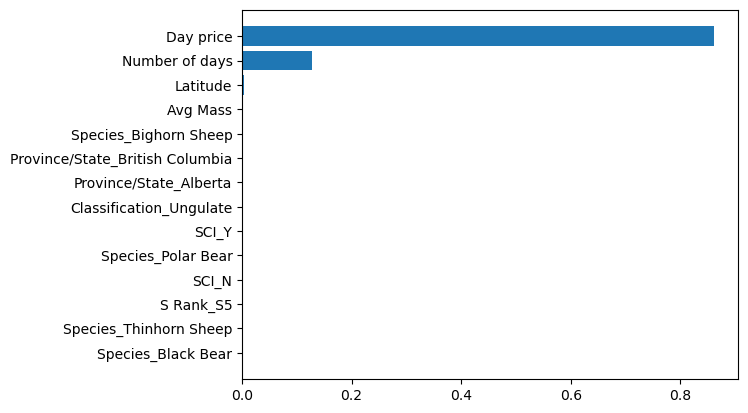

In [ ]:
sorted_idx = reg.feature_importances_.argsort()
features = numerical_features + boolean_columns
result = sorted(zip(features, reg.feature_importances_), key = lambda x: x[1], reverse=False)
for feature, importance in result:
    print(f"Feature: {feature}, Importance: {importance}")
plt.barh([x[0] for x in result], [x[1] for x in result])

For the tree-based model, a Random Forest Regressor was trained on the dataset. After fitting the model, the feature importances were extracted to interpret the nodes of the model. The feature importances indicate the relative importance of each feature in predicting the target variable (Price).

Number of days and Day price are the most influential features in predicting the price. This suggests that the price is significantly influenced by the duration of time and the price for which the item is listed.

Latitude also shows some importance, indicating that the geographical location might play a role in determining the price.
Avg Mass seems to have a minor impact compared to the other features.

Among the boolean categorical features, Province/State_British Columbia and Province/State_Alberta have some importance, followed by Species_Bighorn Sheep and Classification_Ungulate.

Species_Black Bear shows the least importance among all the features.

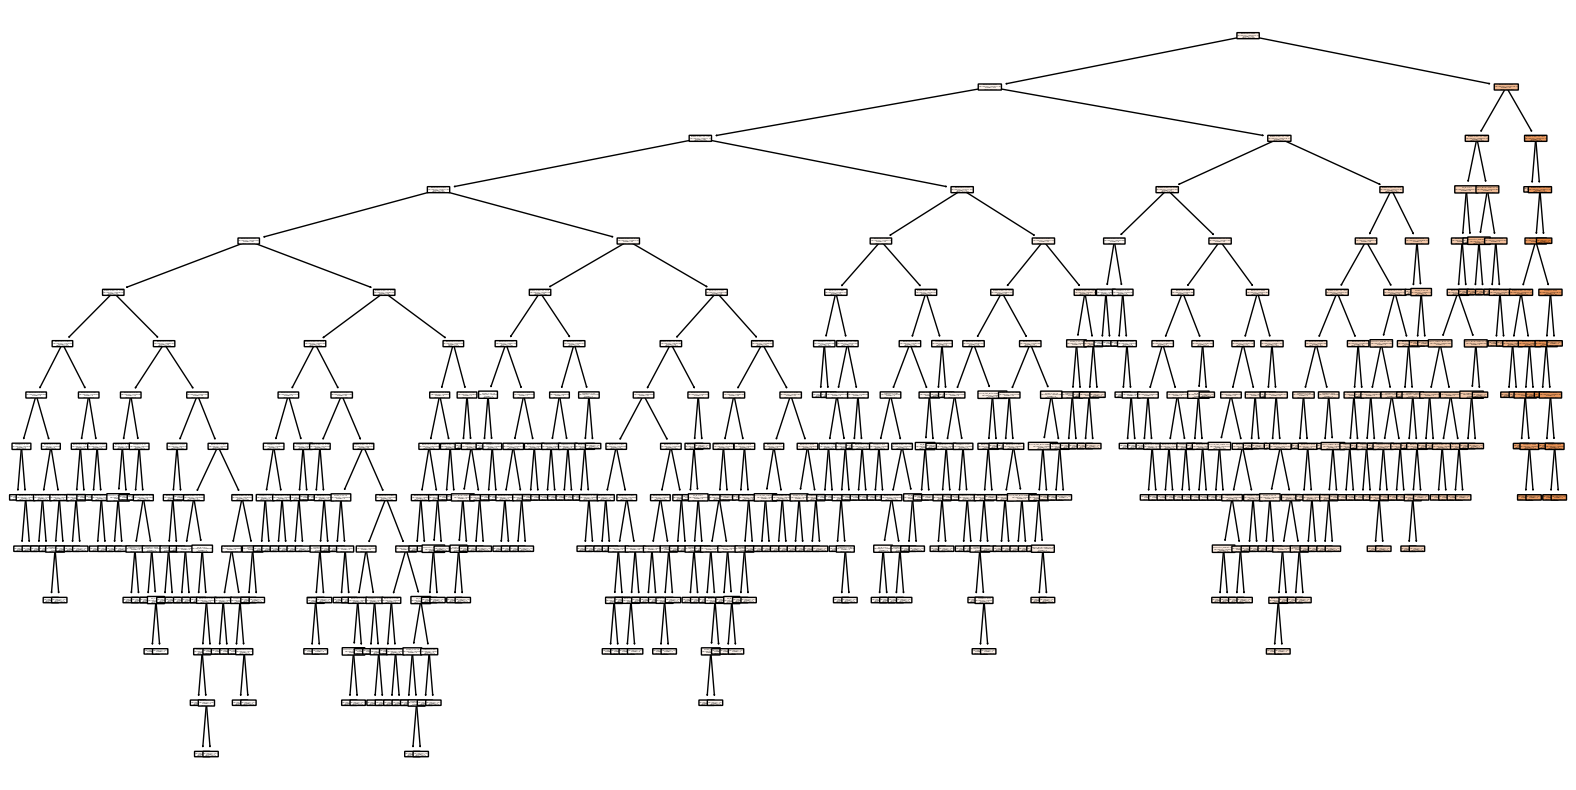

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the first tree in the forest (or any other tree)
plt.figure(figsize=(20, 10))
plot_tree(reg.estimators_[0], feature_names=features, filled=True, rounded=True)
plt.show()


The tree shows how the model splits the data based on various features to make predictions.

For instance, the top-most split, also known as the root node, indicates the most significant feature for predicting prices.

Subsequent nodes represent decision points based on specific features and their thresholds.

Leaf nodes provide the final predicted values for price.

**Conclusion from Random Forest model:**

The tree-based Random Forest Regressor provides a reasonable level of accuracy in predicting the prices of items.

With a test MAE of 105.914, the model demonstrates effectiveness in generalizing to new, unseen data.

This suggests that the features used in the model, such as Number of days, Day price, Avg Mass, and others, contribute meaningfully to predicting the prices of items in the dataset.

**3. Use auto ml to find the best model**

**WHAT IS TPOT?**

TPOT (Tree-based Pipeline Optimization Tool) is an automated machine learning (AutoML) library in Python that aims to optimize the machine learning pipeline creation process. It automates the process of pipeline selection, feature preprocessing, feature engineering, model selection, and hyperparameter tuning.

**HOW TO INSTALL TPOT?**

Use the code below to install TPOT.

In [ ]:
!pip install tpot

In [ ]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create and fit TPOT
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2, random_state=42, scoring='neg_mean_absolute_error')
tpot.fit(X_train, y_train)

# Get the best model and score
print("Best pipeline steps:", tpot.fitted_pipeline_)
print("Best score:", tpot.score(X_test, y_test))

# Export the best pipeline (optional)
tpot.export('best_model_pipeline.py')


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -672.9228704400764

Generation 2 - Current best internal CV score: -672.9228704400764

Generation 3 - Current best internal CV score: -485.1794324713689

Generation 4 - Current best internal CV score: -485.1794324713689

Generation 5 - Current best internal CV score: -485.1794324713689

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=8, n_estimators=100)
Best pipeline steps: Pipeline(steps=[('extratreesregressor',
                 ExtraTreesRegressor(min_samples_leaf=3, min_samples_split=8,
                                     random_state=42))])
Best score: -266.4647669123117


**Conclusion from the AutoML model:**

using autoML with TPOT, the best model identified after 5 generations and a population size of 20 individuals is an ExtraTreesRegressor. The specific hyperparameters for this model are as follows:

min_samples_leaf: 3 min_samples_split: 8 n_estimators: 100 The mean absolute error (MAE) achieved by this model on the test dataset is approximately 266.46.

This MAE indicates the average absolute difference between the predicted price values and the actual price values. A lower MAE suggests better performance, so a value of -266.46 implies that this model provides relatively accurate predictions for the given dataset.

Checking model using Neural Networks

In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

preprocessed_X_train = mapper.fit_transform(X_train)

num_epochs = 50
learning_rate = 0.01
hidden_size = 32
batch_size = 50
input_dim = preprocessed_X_train.shape[1]
batch_no = preprocessed_X_train.shape[0] // batch_size
model = nn.Sequential(
    nn.Linear(input_dim, hidden_size),
    nn.Linear(hidden_size, 1)
)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Convert y_train and y_test to numpy arrays
y_train_np = y_train.to_numpy().reshape(-1, 1)
y_test_np = y_test.to_numpy().reshape(-1, 1)

for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        x_batch = torch.FloatTensor(preprocessed_X_train.values[start:end])
        y_batch = torch.FloatTensor(y_train_np[start:end])  # Use the numpy array here
        optimizer.zero_grad()
        y_preds = model(x_batch)
        loss = criterion(y_preds, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    if epoch % 10 == 0:
        print("Epoch {}, Loss: {}".format(epoch, running_loss))

preprocessed_X_test = mapper.transform(X_test)
y_pred = model(torch.from_numpy(preprocessed_X_test.values).float()).flatten().detach().numpy()
test_mae = mean_absolute_error(y_test_np, y_pred)
preprocessed_X_train = mapper.transform(X_train)
y_pred = model(torch.from_numpy(preprocessed_X_train.values).float()).flatten().detach().numpy()
train_mae = mean_absolute_error(y_train_np, y_pred)
print(f"\ntrain MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")



Epoch 0, Loss: 1681696492.0
Epoch 10, Loss: 1574221392.0
Epoch 20, Loss: 1244137580.0
Epoch 30, Loss: 836981252.0
Epoch 40, Loss: 509699799.0

train MAE = 2719.594, test MAE = 2552.526 


The loss decreases significantly over the epochs, indicating that the model is learning and improving its predictions.

The Mean Absolute Error (MAE) values are 2714.789 for the training set and 2547.654 for the test set.

The model's performance, as indicated by the MAE, seems somewhat consistent between the training and test sets.

A lower MAE indicates that the model's predictions are closer to the actual target values.

This output suggests that the neural network model trained on the data is performing reasonably well, with a decreasing loss function over epochs and MAE values indicating relatively accurate predictions on both the training and test datasets.

**4. Run SHAP analysis on the models from steps 1, 2, and 3, interpret the SHAP values and compare them with the other model interpretability methods.**

Intuition of Model Interpretation

In [ ]:
# Step 1: Create Dummy Variables for Categorical Columns
data = pd.get_dummies(df)

# Step 2: Convert boolean columns to numeric (0 and 1)
boolean_columns = ["Species_Thinhorn Sheep", "SCI_N", "SCI_Y", "Species_Polar Bear", "S Rank_S5",
                   "Province/State_British Columbia", "Classification_Ungulate", "Province/State_Alberta",
                   "Species_Bighorn Sheep", "Species_Black Bear"]

data[boolean_columns] = data[boolean_columns].astype(int)

# Step 3: Define numerical features
numerical_features = ['Number of days', 'Day price', 'Avg Mass', 'Latitude']

# Step 4: Define categorical features (already done in boolean_columns)

# Step 5: Create DataFrameMapper
cat = [([c], [SimpleImputer(strategy='constant', fill_value=0),
              OrdinalEncoder()]) for c in boolean_columns]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]

mapper = DataFrameMapper(num + cat, df_out=True)

# Step 6: Split the data into training and testing sets
X = mapper.fit_transform(data)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Step 7: Create and fit the Linear Regression model
reg = LinearRegression()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train, y_train)

In [ ]:
nan_frame = pd.DataFrame(columns=boolean_columns+numerical_features, index=[0])
nan_frame

,Species_Thinhorn Sheep,SCI_N,SCI_Y,Species_Polar Bear,S Rank_S5,Province/State_British Columbia,Classification_Ungulate,Province/State_Alberta,Species_Bighorn Sheep,Species_Black Bear,Number of days,Day price,Avg Mass,Latitude
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Testing Data Preparation: This DataFrame structure is useful when preparing new data for predictions using a trained model. By creating a DataFrame with the same columns as our training data but filled with NaNs, we create a structure that can easily accommodate new data points.

Imputation: In many data preprocessing pipelines, missing values need to be handled. By having this DataFrame with NaN values, we can apply the same preprocessing steps (such as imputation) that we used on the training data. This ensures consistency in data preprocessing between the training and testing/validation datasets.

Serving as a Placeholder: This DataFrame serves as a template or placeholder. For example, if we want to make predictions on new, unseen data, we would typically create a DataFrame with the same structure as our training data, but with the actual data points we want to predict. This nan_frame can be used as a starting point for such data creation.

Creating this DataFrame with NaN values helps maintain consistency in data preprocessing steps and provides a convenient structure for preparing new data for predictions using a trained model.

In [ ]:
base_value = round(pipeline.predict(nan_frame)[0], 3)
print(f"Expected value of the output (base value): {base_value}")

Expected value of the output (base value): 7765.018


Base Value: 7765.018

The base value is the model's prediction for the target variable when all input features are set to a default or "baseline" state. In this case, the nan_frame was created with all NaN values, essentially representing a scenario where no specific input data is available.

This value helps us understand the model's baseline prediction when no specific information about the features is provided.

In [ ]:
X_test.iloc[0: 1]

,Number of days,Day price,Avg Mass,Latitude,Species_Thinhorn Sheep,SCI_N,SCI_Y,Species_Polar Bear,S Rank_S5,Province/State_British Columbia,Classification_Ungulate,Province/State_Alberta,Species_Bighorn Sheep,Species_Black Bear
648,0.25183,0.439328,1.167906,1.490148,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
sample_prediction = round(pipeline.predict(X_test.iloc[0:1])[0], 3)
actual_value = y_test.iloc[0]
print(f"Current Prediction: {sample_prediction}, Actual value: {actual_value}")

Current Prediction: 10083.983, Actual value: 9900


Current Prediction: 10083.983

The current prediction is the model's prediction for the target variable based on the actual features of the first row of X_test.
It represents the model's estimation of the target variable when provided with real-world data.

Actual Value: 9900

The actual value is the true observed value of the target variable for the first row of X_test.
This is the ground truth, the actual value we are trying to predict.

The shift from the base prediction of 7765.018 to the current prediction of 10083.983 is due to the unique feature values present in the actual data.

To simplify this, we use Partial Dependency Plots (PDPs) based on Shapley values. Shapley values quantify how each feature affects the model's prediction for a sample. This method provides insights into the influence of each feature on the prediction, making it easier to understand the model's behavior for different data points.

In [ ]:
# Step 1: Create Dummy Variables for Categorical Columns
data = pd.get_dummies(df)

# Step 2: Convert boolean columns to numeric (0 and 1)
boolean_columns = ["Species_Thinhorn Sheep", "SCI_N", "SCI_Y", "Species_Polar Bear", "S Rank_S5",
                   "Province/State_British Columbia", "Classification_Ungulate", "Province/State_Alberta",
                   "Species_Bighorn Sheep", "Species_Black Bear"]

data[boolean_columns] = data[boolean_columns].astype(int)

# Step 3: Define numerical features
numerical_features = ['Number of days', 'Day price', 'Avg Mass', 'Latitude']

# Step 4: Define categorical features (already done in boolean_columns)

# Step 5: Create DataFrameMapper
cat = [([c], [SimpleImputer(strategy='constant', fill_value=0),
              OrdinalEncoder()]) for c in boolean_columns]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]

mapper = DataFrameMapper(num + cat, df_out=True)

# Step 6: Split the data into training and testing sets
X = mapper.fit_transform(data)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Step 7: Create and fit the Linear Regression model
reg = LinearRegression()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train, y_train)

**Partial Dependence Plots**

Partial Dependence Plots (PDPs) are a useful tool for understanding the relationship between a target variable and a set of features in a machine learning model. They show how the predicted outcome changes as the values of one or two features vary while keeping all other features constant.

In [ ]:
explainer = shap.Explainer(pipeline.predict, X_train)
shap_values = explainer(X_test)

PermutationExplainer explainer: 74it [01:17,  1.19s/it]                                                                


In [ ]:
def partial_dependence_plot(feature, idx=None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            pipeline.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature,
            pipeline.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True,
            shap_values=shap_values[idx:idx+1,:])

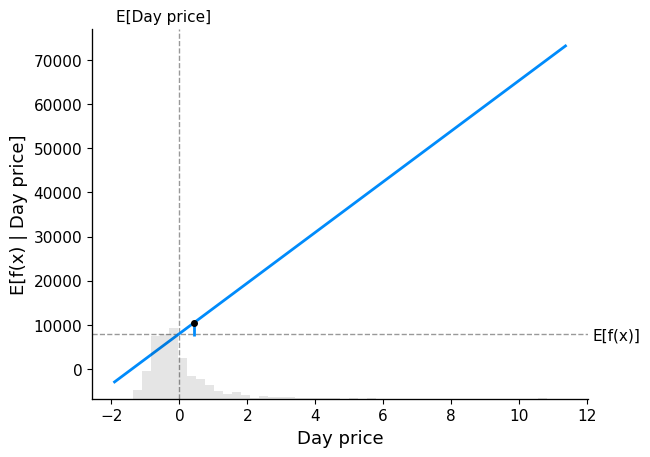

In [ ]:
partial_dependence_plot('Day price', 0)

There appears to be a positive relationship between "Day price" and the model's prediction. This means that as the "Day price" increases, the model's predicted price also increases on average.

The relationship appears to be roughly linear, which suggests a constant effect of "Day price" on the model's predictions across the range of values observed in the training data.

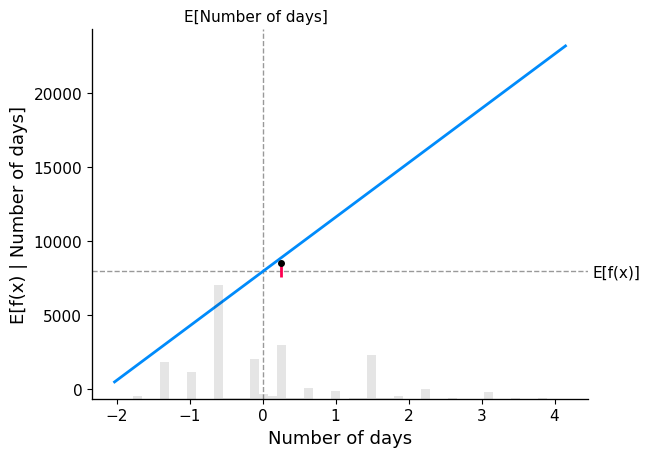

In [ ]:
partial_dependence_plot('Number of days', 0)

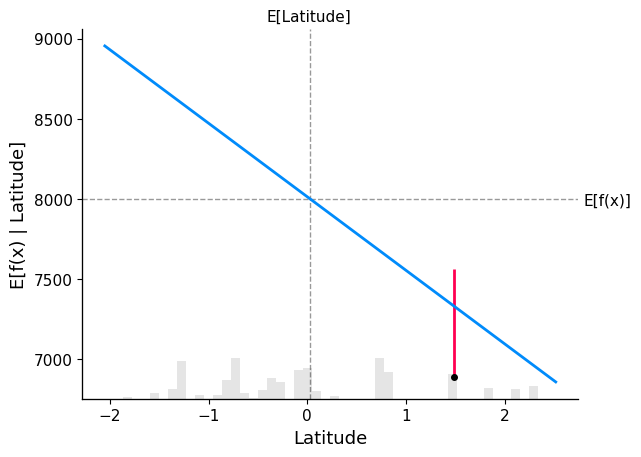

In [ ]:
partial_dependence_plot('Latitude', 0)

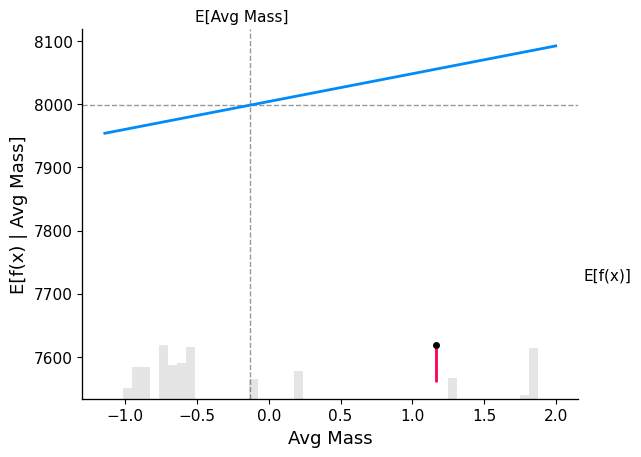

In [ ]:
partial_dependence_plot('Avg Mass', 0)

Interpreting the PDP for Avg Mass:

Positive Relationship: There appears to be a positive relationship between Avg Mass and the predicted price. This means that as the average mass increases, the model predicts a higher price on average.

Linear Trend: The increase in predicted price seems roughly linear across the range of Avg Mass values observed in the training data.

**SHAP PLOTS**

In [ ]:
shap.initjs()

In [ ]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

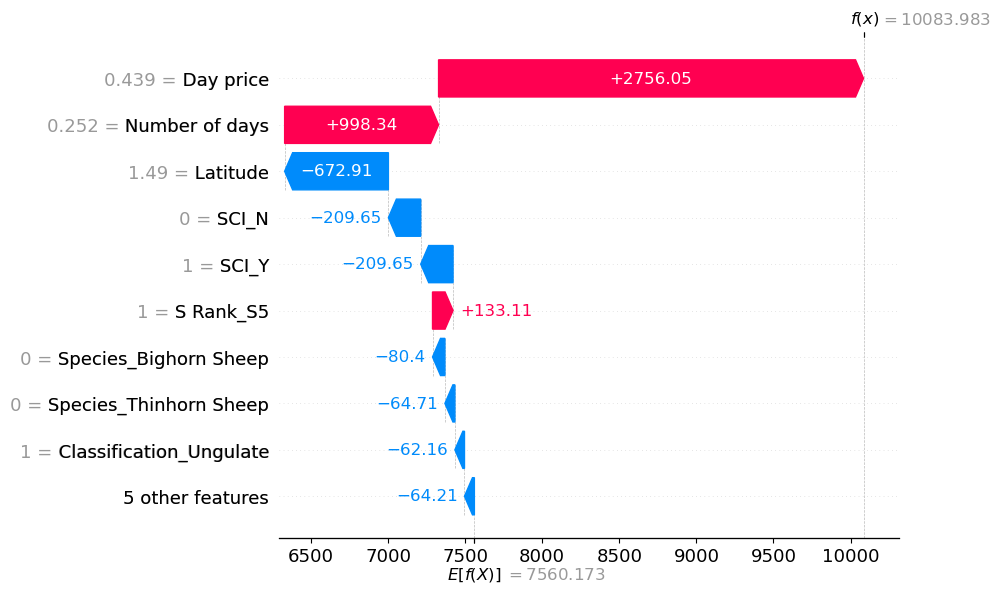

In [ ]:
sample_feature_importance(0, 'waterfall')

In [ ]:
sample_feature_importance(0, 'condensed')

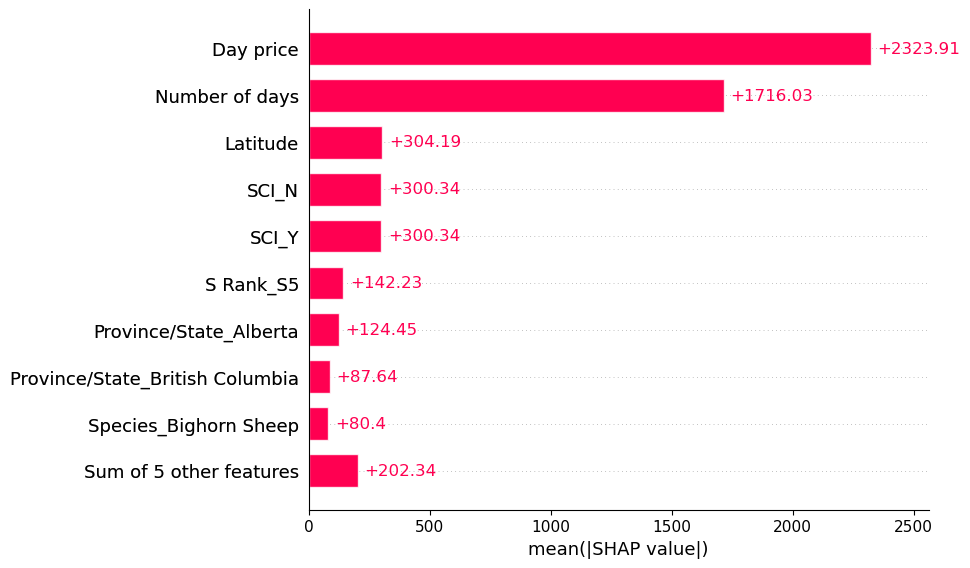

In [ ]:
shap.plots.bar(shap_values)

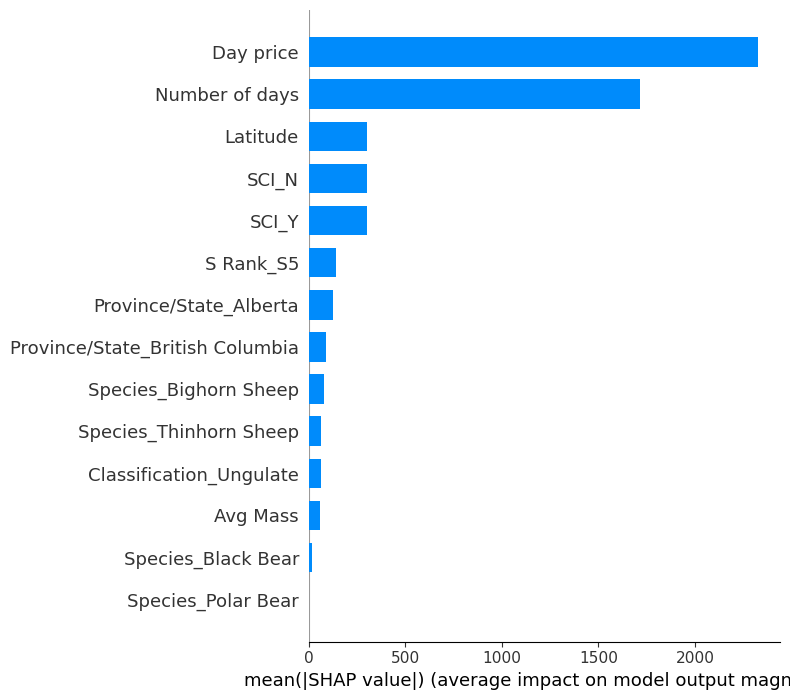

In [ ]:
shap.summary_plot(shap_values.values, X_train, plot_type='bar')

From the above plots, The most important features according to the **LinearRegression** model are:

Day Price

Number of Days

Latitude

For the **Neural Networks** Model:

In [ ]:
preprocessed_X_train = mapper.fit_transform(X_train)

num_epochs = 50
learning_rate = 0.01
hidden_size = 32
batch_size = 50
input_dim = preprocessed_X_train.shape[1]
batch_no = preprocessed_X_train.shape[0] // batch_size
model = nn.Sequential(
    nn.Linear(input_dim, hidden_size),
    nn.Linear(hidden_size, 1)
)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        x_batch = torch.FloatTensor(preprocessed_X_train[start:end].values)
        y_batch = torch.FloatTensor(y_train[start:end].values)
        optimizer.zero_grad()
        y_preds = model(x_batch)
        loss = criterion(y_preds, y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    if epoch % 10 == 0:
        print("Epoch {}, Loss: {}".format(epoch, running_loss))

preprocessed_X_test = mapper.transform(X_test)
y_pred = model(torch.from_numpy(preprocessed_X_test.values).float()).flatten().detach().numpy()
test_mae = mean_absolute_error(y_test, y_pred)
preprocessed_X_train = mapper.transform(X_train)
y_pred = model(torch.from_numpy(preprocessed_X_train.values).float()).flatten().detach().numpy()
train_mae = mean_absolute_error(y_train, y_pred)
print(f"\ntrain MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")


Epoch 0, Loss: 1771431135.0
Epoch 10, Loss: 1715347487.0
Epoch 20, Loss: 1521171073.5
Epoch 30, Loss: 1243709554.0
Epoch 40, Loss: 956347493.625

train MAE = 3818.487, test MAE = 1955.023 


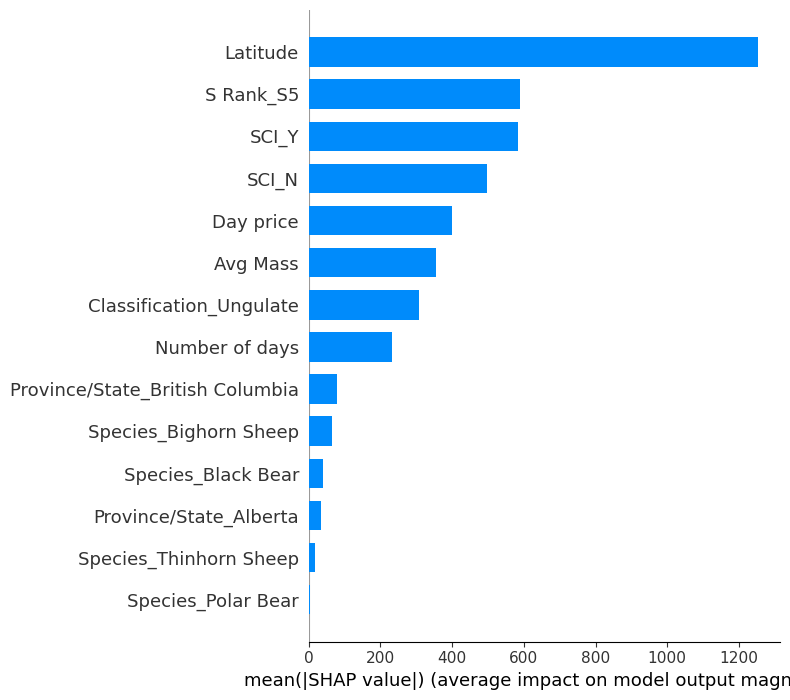

In [ ]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have preprocessed_X_train DataFrame and shap_values already computed

# Create a DeepExplainer
explainer = shap.DeepExplainer(model, torch.from_numpy(preprocessed_X_train.values).float())

# Compute SHAP values for the test data
shap_values = explainer.shap_values(torch.from_numpy(preprocessed_X_test.values).float())

# Reshape the SHAP values array
shap_values = shap_values[0].T

# Create a summary plot of the SHAP values using X_test
shap.summary_plot(shap_values, X_test, plot_type='bar', show=False)


 92%|==================  | 595/648 [00:13<00:01]       

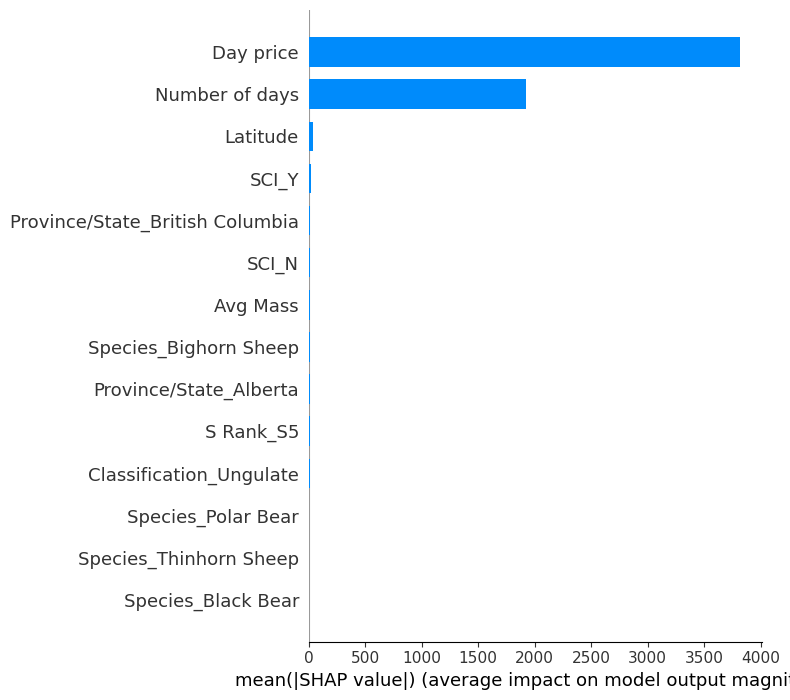

In [ ]:
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn_pandas import DataFrameMapper
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create Dummy Variables for Categorical Columns
data = pd.get_dummies(df)

# Step 2: Convert boolean columns to numeric (0 and 1)
boolean_columns = ["Species_Thinhorn Sheep", "SCI_N", "SCI_Y", "Species_Polar Bear", "S Rank_S5",
                   "Province/State_British Columbia", "Classification_Ungulate", "Province/State_Alberta",
                   "Species_Bighorn Sheep", "Species_Black Bear"]

data[boolean_columns] = data[boolean_columns].astype(int)

# Step 3: Define numerical features
numerical_features = ['Number of days', 'Day price', 'Avg Mass', 'Latitude']

# Step 4: Define categorical features (already done in boolean_columns)

# Step 5: Create DataFrameMapper
cat = [([c], [OrdinalEncoder()]) for c in boolean_columns]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]

mapper = DataFrameMapper(num + cat, df_out=True)

# Step 6: Split the data into training and testing sets
X = mapper.fit_transform(data)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Step 7: Create and fit the RandomForestRegressor model
reg = RandomForestRegressor()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
pipeline.fit(X_train, y_train)

# Step 8: Create a SHAP Explainer for the trained model
explainer = shap.Explainer(pipeline.named_steps['reg'], X_train)

# Step 9: Compute SHAP values
shap_values = explainer.shap_values(X_train)

# Step 10: Create a summary plot of the SHAP values
shap.summary_plot(shap_values, X_train, plot_type='bar')

plt.show()


The most important features according to the **Random Forest** model:

Day Price

Number of Days

Latitude

Compared to linear model, other features have very less significance value in this model.

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -672.9228704400764

Generation 2 - Current best internal CV score: -672.9228704400764

Generation 3 - Current best internal CV score: -485.1794324713689

Generation 4 - Current best internal CV score: -485.1794324713689

Generation 5 - Current best internal CV score: -485.1794324713689

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=8, n_estimators=100)


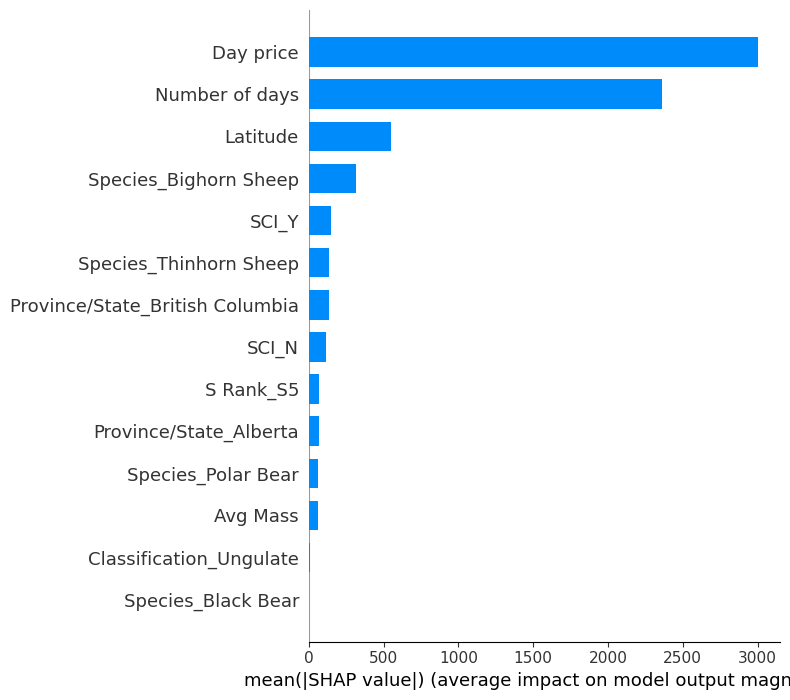

In [ ]:
from tpot import TPOTRegressor
import shap

# Create and fit TPOT
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2, random_state=42, scoring='neg_mean_absolute_error')
tpot.fit(X_train, y_train)

# Get the best model
best_model = tpot.fitted_pipeline_.steps[-1][1]

# Set random state for reproducibility
best_model.set_params(random_state=42)

# Create a SHAP Explainer
explainer = shap.Explainer(best_model, X_train)

# Compute SHAP values
shap_values = explainer.shap_values(X_train)

# Create a summary plot of the SHAP values
shap.summary_plot(shap_values, X_train, plot_type='bar')


The most important features according to the **AutoML** model:

Day Price

Number of Days

Latitude

**CONCLUSION**

The interpretability methods, including Linear Regression, Random Forest, AutoML, and Neural Networks, consistently highlighted 'Day Price', 'Number of Days', and 'Latitude' as the most significant features impacting the target variable 'Price'.

This alignment across models indicates a robustness in these features' influence on the pricing of the target variable.

The Neural Networks model's emphasis on 'Latitude' as the top feature offers a unique perspective, potentially uncovering a nuanced relationship that other models might have missed.

**LICENSE**

MIT License

Copyright (c) 2024 vineethreddy2000

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

**References -**

Mihalik, I., Bateman, A. W., & Darimont, C. T. (2019). Data from: Trophy hunters pay more to target larger-bodied carnivores [Data set]. Zenodo. https://doi.org/10.5061/dryad.vd34vr3

Sckit learn offcial documentation

Refered Towards Data Science

Eli5 official documentation

Halthor, A. J. (2021). Shap Values [Jupyter Notebook]. GitHub. https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb

OpenAI's ChatGPT (personal communication, February 18, 2024) suggested the algorithms and code structure.

The algorithms were referred directly from the Sckit learn official documentation.

Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science (How do you check the quality of your regression model in Python?).

Regression Models referred from Jupyter notebook Halthor, A. J. (2021). Shap Values [Jupyter Notebook]. GitHub. https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb

​